<a href="https://colab.research.google.com/github/snehalad/image-classification-with-deep-learning/blob/main/food-image-classification-with-deep-learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone Project 1 : Food Vision Big

https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/07_food_vision_milestone_project_1.ipynb

In [ ]:
!pip install tensorflow==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0rc0, 2.12.0rc1)
ERROR: No matching distribution found for tensorflow==2.4.1


In [ ]:
import tensorflow as tf

tf.__version__

'2.11.0'

### Check GPU

Google colab offers free GPU's , however not all of them are compatible with [**mixed precision**](https://www.tensorflow.org/guide/mixed_precision) training.

Google offers:
- K80 (not compatible)
- P100 (not compatible)
- Tesla T4 (compatible)

Knowing this, in order to use mixed precision training we need accesss to a Tesla T4 (from within Google Colab) or if we're using own hardware, our GPU need of 7.0+ (see here: https://developer.nvidia.com/cuda-gpus).

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-579efa39-48ab-0623-e774-5e4e3024c5b4)


### Get helper Function

https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-03-14 10:54:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-03-14 10:54:55 (102 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# import series of helper function for notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

### Use Tensorflow DataSets to Download Data

In [ ]:
# get tensorflow datasets
import tensorflow_datasets as tfds

In [ ]:
# list all available datasets
datasets_list = tfds.list_builders()
print("food101" in datasets_list)

True


In [ ]:
# load in the data
(train_data, test_data), ds_info = tfds.load(name="food101",
                                             split=["train", "validation"],
                                             shuffle_files=True,
                                             as_supervised=True, # get data returned in tuple format
                                             with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteISD9JZ/food101-train.tfrecord*...:   0%|          …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteISD9JZ/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


### Exploring the Food101 data from Tensorflow Datasets

* Class names
* The shape of our input data(image tesnors)
* The datatype of our input data
* what the labels look like (e.g are they one hot encoded or they are label encoded)
* Do the labels match up with the class names?

In [ ]:
# features of food101 from TFDS
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [ ]:
# get the class names
class_names = ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [ ]:
# take one sample of train data
train_one_sample = train_data.take(1)

In [ ]:
# sample look like (image_tensor, label)
train_one_sample

<TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape}
  Image dtype: {image.dtype}
  Target class from Food101 (tesnsor form): {label}
  Class name (str form): {class_names[label.numpy()]}
  """)


  Image shape: (384, 512, 3)
  Image dtype: <dtype: 'uint8'>
  Target class from Food101 (tesnsor form): 56
  Class name (str form): huevos_rancheros
  


In [ ]:
image

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [144,  81, 102],
        [142,  78, 102],
        [139,  75,  99]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [159,  96, 115],
        [154,  89, 111],
        [146,  83, 104]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [162,  98, 114],
        [162,  95, 113],
        [157,  93, 110]],

       ...,

       [[ 75,  32,  16],
        [ 77,  34,  17],
        [ 78,  35,  19],
        ...,
        [ 99,  31,  20],
        [104,  32,  20],
        [106,  34,  20]],

       [[ 81,  34,  18],
        [ 81,  34,  16],
        [ 82,  35,  19],
        ...,
        [102,  33,  26],
        [104,  36,  27],
        [109,  39,  31]],

       [[ 79,  30,  13],
        [ 80,  31,  14],
        [ 81,  32,  15],
        ...,
        [113,  46,  4

In [ ]:
# what are min and max values of our image tesnor?
import tensorflow as tf
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

#### Plot an image from Tensorflow Datasets

(-0.5, 511.5, 383.5, -0.5)

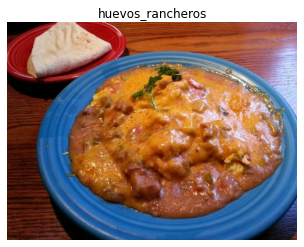

In [ ]:
# plot an image tesnor
import matplotlib.pyplot as plt

plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False)

### Create preprocessing function for our data

What we know about our data:
* In `uint8` datatype
* Comprised of all different size tensord (different sized images)
* Not scaled (the pixel values are between 0 & 255)

What we know models like:
* Data in `float32` dtype (or for mixed precision `float16` and `float32`)
* For batches, Tensorflow likes all of the tensors within a batch to be of the same size.
* Scales (values between 0 & 1) also called normalized tensors generally perform better.

with these points in mind, we've got a few things we can tracle with a preprocessing function.

Since we're going to be using an EfficientNetBx pretrained model from tf.keras.applications we don't need to rescale our data (these architectures have rescaling built-in)
This means our functions need to:
1. Reshape our images to all the same size
2. Convert the dtype of our image tensors from unit8 to float32

In [ ]:
# (image, label)
# make a funtion for preprocessing images
def preprocess_img(image, label, img_shape=224):
  """
  Converts image datatype from  'uint'-> 'float32' and reshapes
  image to [img_shape, image_shape, colour_channels]
  """
  image = tf.image.resize(image, [img_shape, img_shape]) # reshape target image
  # image = image/255. # scale image values (not req for efficient)
  return tf.cast(image, tf.float32), label # return (float32_image, label) tuple


In [ ]:
# preprocess a single sample image and check output
preprocessed_img = preprocess_img(image, label)[0]
print(f"Image before preprocessing:\n {image[:2]}..., \nShape: {image.shape}, \nDatatype:{image.dtype}\n")
print(f"Image after preprocessing:\n {preprocessed_img[:2]}...,\nShape: {preprocessed_img.shape}, \nDataType:{preprocessed_img.dtype}")

Image before preprocessing:
 [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  81 102]
  [142  78 102]
  [139  75  99]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [159  96 115]
  [154  89 111]
  [146  83 104]]]..., 
Shape: (384, 512, 3), 
Datatype:<dtype: 'uint8'>

Image after preprocessing:
 [[[  0.         0.         0.      ]
  [  0.         0.         0.      ]
  [  0.         0.         0.      ]
  ...
  [157.23973   91.24997  110.18368 ]
  [150.2857    86.622444 107.239784]
  [144.57637   80.47435  103.6325  ]]

 [[  0.         0.         0.      ]
  [  0.         0.         0.      ]
  [  0.         0.         0.      ]
  ...
  [157.85226   91.70941  105.097206]
  [164.45404   97.72448  114.3112  ]
  [159.09677   93.16319  110.545815]]]...,
Shape: (224, 224, 3), 
DataType:<dtype: 'float32'>


### Batch and prepare datasets

we're now going to make our data input pipeline run really fast.

The `tf.data` API makes it possible to handle large amounts of data, read from different data formats, and perform complex transformations.

Reference-> https://www.tensorflow.org/guide/data_performance

In [ ]:
# map preprocessing function to training (and parallelize)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle train data and turn into batches and prefetch it (loat it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# map preprocessing function to test data
test_data = test_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_data, test_data

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

- `map` this preprocessing function `preprocess_img` across our training dataset
- `shuffle` - Shuffle a number of elements and then `batch` them together and finally make sure you prepare new batches `prefetch` whilst the model is looking
through (finding patterns the current batch).

-> No need to use shuffle for test_data

### Create modelling callbacks

Callbacks are **TensorBaord, ModelCheckPointing, EarlyStopping** 

We're going to create a couple of callbacks to help us while our model trains:
- TensorBoard callback to log training results (so we can visualize them later if need be)
- ModelCheckpoint callback to save our model's progress afetr feature extraction.

In [ ]:
# create tensorboard callback (import from helper_functions.py)
from helper_functions import create_tensorboard_callback

# create modelcheckpoint callback to save a model's progress during training
checkpoint_path = "model_checkpoint/cp.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_acc",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      verbose=0) # don't print anything

### Setup mixed precision training 
first and foremost, for a deeper understanding of mixed precision training, check out the tensorflow guide for mixed precision: https://www.tensorflow.org/guide/mixed_precision

Mixed precision utilizes a combination of float32 and float16 data types to speed up model performance

In [ ]:
# turn on mixed precision training 
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16") # set global data policy to mixed precision

In [ ]:
mixed_precision.global_policy()

<Policy "mixed_float16">

### Build Feature extraction model

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# create base model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# create functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
# Note: EfficientNetB0 having rescaling built in so we are not adding that layer
# x = preprocessing.Rescalling(1./255)(x)
x = base_model(inputs, training=False) 
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model = tf.keras.Model(inputs, outputs)

# compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


16705208/16705208 [==============================] - 2s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

### checking layer dtype policies (are we using mixed precision)

In [ ]:
# check dtype policy 
for layer in model.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
global_average_pooling2d True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


In [ ]:
# check dtype_policy attributes of layers in the base model
for layer in model.layers[1].layers[:20]:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 False float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
rescaling_1 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <

In [ ]:
mixed_precision.global_policy()

<Policy "mixed_float16">

In [ ]:
# if you want to change 
# mixed_precision.set_global_policy("float32")

### Fit the feature extraction model
if our goal is to fine-tune a pretrained model, the general order of doing things are:
- Build a feature extraction model (train a couple output layers with base layers frozen)
- Fine-tune some of the frozen layers

In [ ]:
# fit and feature extraction model with callbacks
history_101_food_classes_feature_extract = model.fit(train_data,
                                                     epochs=3,
                                                     steps_per_epoch=(len(train_data)),
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15*len(test_data)),
                                                     callbacks=[create_tensorboard_callback(dir_name="training_logs",
                                                                                            experiment_name="efficientnetb0_101_food_feature_extraction"),
                                                                model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_food_feature_extraction/20230314-111105
Epoch 1/3
2368/2368 [==============================] - ETA: 0s - loss: 1.7188 - accuracy: 0.5806

2368/2368 [==============================] - 196s 76ms/step - loss: 1.7188 - accuracy: 0.5806 - val_loss: 1.1237 - val_accuracy: 0.7002
Epoch 2/3
2367/2368 [============================>.] - ETA: 0s - loss: 1.2000 - accuracy: 0.6898

2368/2368 [==============================] - 180s 75ms/step - loss: 1.2000 - accuracy: 0.6898 - val_loss: 1.0360 - val_accuracy: 0.7188
Epoch 3/3
2368/2368 [==============================] - ETA: 0s - loss: 1.0542 - accuracy: 0.7231

2368/2368 [==============================] - 174s 73ms/step - loss: 1.0542 - accuracy: 0.7231 - val_loss: 0.9929 - val_accuracy: 0.7180


This model gives us 70% accuracy

In [ ]:
# evaluate model on whole test dataset
results_feature_extarct_model = model.evaluate(test_data)
results_feature_extarct_model

790/790 [==============================] - 53s 67ms/step - loss: 0.9975 - accuracy: 0.7281


[0.9974784255027771, 0.7280791997909546]

## Load And Evalaute checkpoint weights

We can load in and evaluate our model's checkpoints by:

- Cloning our model using tf.keras.models.clone_model() to make a copy of our feature extraction model with reset weights.
- Calling the load_weights() method on our cloned model passing it the path to where our checkpointed weights are stored.
- Calling evaluate() on the cloned model with loaded weights.

In [ ]:
# clone model
cloned_model = tf.keras.models.clone_model(model)
cloned_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

In [ ]:
# where checkpoint stored?
checkpoint_path

'model_checkpoint/cp.ckpt'

In [ ]:
# load checkpointed weights into cloned_model
# cloned_model.load_weights(checkpoint_path)

In [ ]:
# Compile cloned_model (with same parameters as original model)
cloned_model.compile(loss="sparse_categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

In [ ]:
# Evalaute cloned model with loaded weights (should be same score as trained model)
results_cloned_model_with_loaded_weights = cloned_model.evaluate(test_data)

790/790 [==============================] - 53s 63ms/step - loss: 4.6152 - accuracy: 0.0074


Our cloned model with loaded weight's results should be very close to the feature extraction model's results (if the cell below errors, something went wrong).

In [ ]:
# # Loaded checkpoint weights should return very similar results to checkpoint weights prior to saving
# import numpy as np
# assert np.isclose(results_feature_extarct_model, results_cloned_model_with_loaded_weights).all()

Cloning the model preserves dtype_policy's of layers (but doesn't preserve weights) so if we wanted to continue fine-tuning with the cloned model, we could and it would still use the mixed precision dtype policy.

In [ ]:
# Check the layers in the base model and see what dtype policy they're using
for layer in cloned_model.layers[1].layers[:20]: # check only the first 20 layers to save printing space
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 True float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
rescaling_1 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <P

💢 After this Follow code from here: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/07_food_vision_milestone_project_1.ipynb